## Unsupervised Learning Example: KMeans

This example uses KMeans Algorithm in sklearn library to cluster a set of samples

In [ ]:
#make sure sklearn is installed
!conda install scikit-learn

In [1]:
#load required functions and libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#prepare the data
data=pd.read_csv("students.csv")#load csv data file
data=data.drop(['Timestamp','github','Mathematics'],axis=1)#remove unnecessary features
Names=np.array(data[['Name']].values)
data=data.set_index('Name')
print(data.shape)
print(data.head())

#convert physical computing text to numbers
leComputing=LabelEncoder()
leComputing.fit(data[['computing']].values)
data[['computing']]=leComputing.transform(data[['computing']].values)


#data=data.drop(['Name'],axis=1)#remove name feature

#convert data to samples
X=np.array(data.values)
#apply KMeans to K clusters
ClustersCount=7
kmeans = KMeans(n_clusters=ClustersCount, random_state=0)
kmeans.fit(X)#fit the samples, and find the clusters

lst=zip(Names,kmeans.labels_)
print("Associated Clusters")
for a,b in lst:
    print("{0} --> {1}".format(a[0],b))

(20, 4)
       Programming  Python  Unity3D      computing
Name                                              
C.Y              2       2         1           NaN
X.L.Y            2       2         1       Arduino
S.H              2       3         1           NaN
M.K              6       5         1           NaN
Y.H.T            3       3         1  Raspberry Pi
Associated Clusters
C.Y --> 0
X.L.Y --> 0
S.H --> 0
M.K --> 3
Y.H.T --> 5
A.G --> 1
H.J --> 0
E.W --> 2
H --> 0
G.B --> 4
C.L --> 6
G.C --> 0
L --> 0
Y --> 0
B.W --> 6
M --> 2
J.N --> 0
L.X --> 0
J.Z --> 0
L2 --> 6


/anaconda2/envs/tf-cpu/lib/python2.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda2/envs/tf-cpu/lib/python2.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
def plotPoints(x,y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(A,B,c=kmeans.labels_)
    for i,v in enumerate(Names):
        plt.annotate(str(i),(A[i],B[i]))
    plt.scatter(centers_x,centers_y,marker='+')
    plt.show()

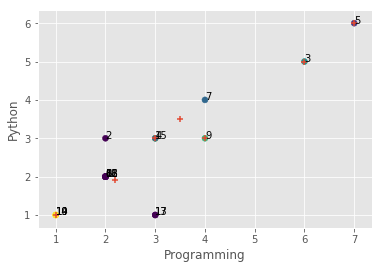

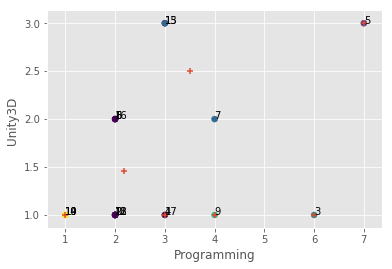

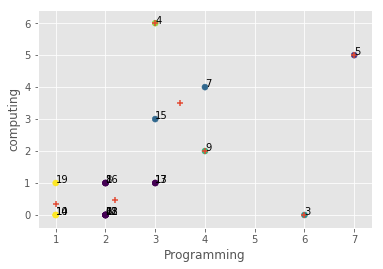

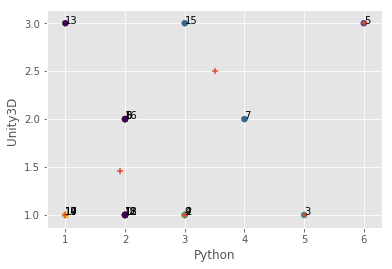

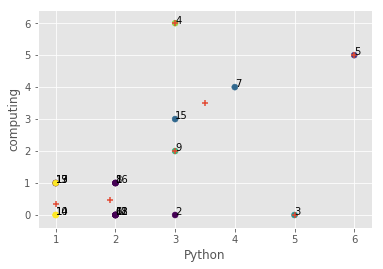

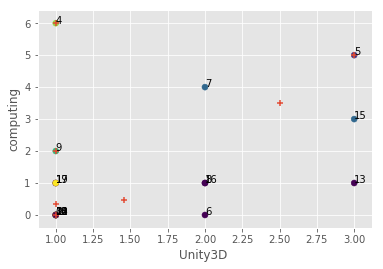

In [3]:
idx0=0
idx1=2

for idx0 in range(0,len(kmeans.cluster_centers_[0])-1):
    for idx1 in range(idx0+1,len(kmeans.cluster_centers_[0])):
        A=X[:,idx0]
        B=X[:,idx1]
        centers_x=kmeans.cluster_centers_[:,idx0]
        centers_y=kmeans.cluster_centers_[:,idx1]
        plotPoints(data.columns.values[idx0],data.columns.values[idx1])